In [1]:
import pandas as pd
import numpy as np
import os
from datetime import timedelta, datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
df

# examining the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  8432 non-null   object 
 1   Country/Region  19220 non-null  object 
 2   Lat             19220 non-null  float64
 3   Long            19220 non-null  float64
 4   Date            19220 non-null  object 
 5   Confirmed       19219 non-null  float64
 6   Deaths          19219 non-null  float64
 7   Recovered       19219 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


In [8]:
# 
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df['New_Confirmed'] = df['Confirmed'].diff()
df['New_Deaths'] = df['Deaths'].diff()
df['New_Recovered'] = df['Recovered'].diff()



In [9]:
hk = df[df['Province/State'] == 'Hong Kong'].reset_index(drop=True)
df['New_Confirmed'] = hk['Confirmed'].diff()
df['New_Deaths'] = hk['Deaths'].diff()
df['New_Recovered'] = hk['Recovered'].diff()

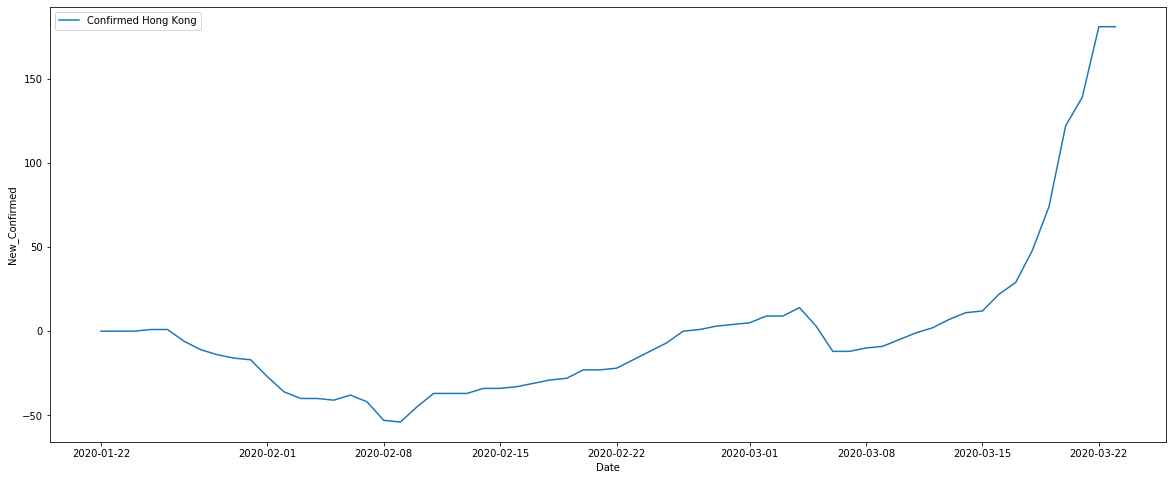

In [10]:
plt.figure(figsize = (20, 8))
sns.lineplot(x="Date", y="New_Confirmed", data=hk, label='Confirmed Hong Kong')